<a href="https://colab.research.google.com/github/kithmini-wijesiri/sample_projects/blob/master/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question 1

In [ ]:
# basic imports
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
datapath = './'

# import autograd wrapped numpy
import autograd.numpy as np

In [ ]:
!cat student_debt.csv

2.004200000000000045e+03,2.004500000000000000e+03,2.004799999999999955e+03,2.005000000000000000e+03,2.005200000000000045e+03,2.005500000000000000e+03,2.005799999999999955e+03,2.006000000000000000e+03,2.006200000000000045e+03,2.006500000000000000e+03,2.006799999999999955e+03,2.007000000000000000e+03,2.007200000000000045e+03,2.007500000000000000e+03,2.007799999999999955e+03,2.008000000000000000e+03,2.008200000000000045e+03,2.008500000000000000e+03,2.008799999999999955e+03,2.009000000000000000e+03,2.009200000000000045e+03,2.009500000000000000e+03,2.009799999999999955e+03,2.010000000000000000e+03,2.010200000000000045e+03,2.010500000000000000e+03,2.010799999999999955e+03,2.011000000000000000e+03,2.011200000000000045e+03,2.011500000000000000e+03,2.011799999999999955e+03,2.012000000000000000e+03,2.012200000000000045e+03,2.012500000000000000e+03,2.012799999999999955e+03,2.013000000000000000e+03,2.013200000000000045e+03,2.013500000000000000e+03,2.013799999999999955e+03,2.014000000000000000e+03


##**Performance of gradient descent in tuning the Least Squares cost function**

Here we compare the performance of gradient descent in tuning the Least Squares cost function on the United States student debt dataset - loaded in and plotted below - when using the raw dataset versus when the input is normalized. Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w,version):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice

        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm

        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm

        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval

    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing
    # the gradient at the final step we don't get the final cost function value
    # via the Automatic Differentiatoor)
    cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
# load data
data = np.loadtxt(datapath + 'student_debt.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

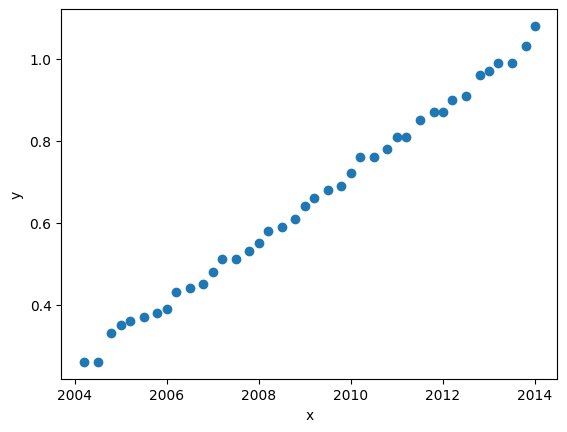

In [ ]:
import matplotlib.pyplot as plt
# Plot the scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# an implementation of the least squares cost function for linear regression
def least_squares(w):
  cost = np.sum((model(x,w) - y)**2)
  return cost/float(y.size)

In [ ]:
# compute linear combination of input point
def model(x,w):
  a = w[0] + np.dot(x.T,w[1:])
  return a.T

In [ ]:
g = least_squares; w = np.array([0.0,0.0])[:,np.newaxis]; max_its = 25; alpha_choice = 10**(-7);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, 'none')

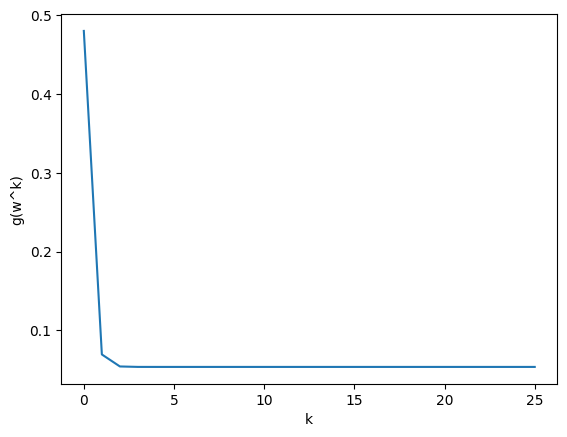

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");
plt.show()

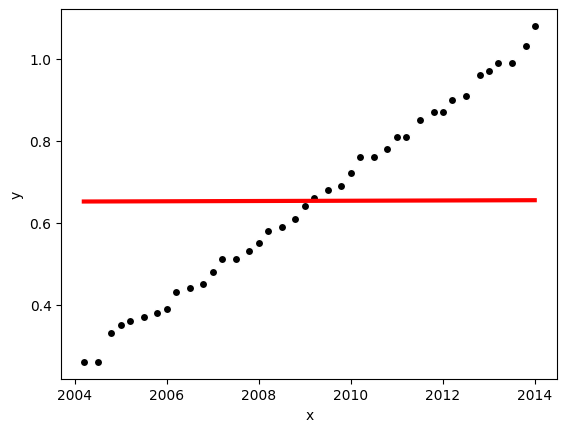

In [ ]:
# plot data with linear fit
s = np.linspace(np.min(x),np.max(x))
ind = np.argmin(cost_history)
w = weight_history[ind]

t = w[0] + w[1]*s

figure = plt.figure()
plt.plot(s,t,linewidth = 3,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]

    # check to make sure thta x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer
    return normalizer,inverse_normalizer

In [ ]:
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)
g = least_squares; w = np.array([0.0,0.0])[:,np.newaxis]; max_its = 25; alpha_choice = 10**(-1);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, 'none')

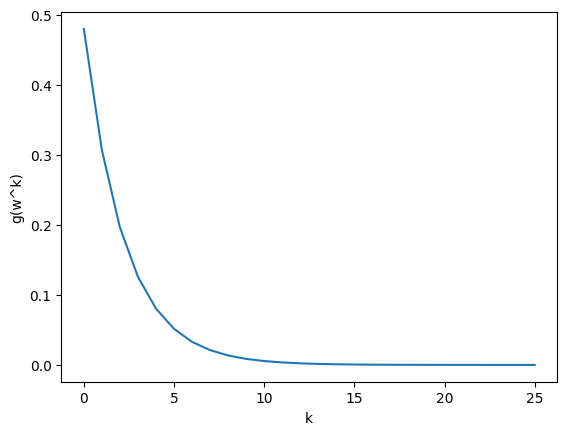

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");
plt.show()

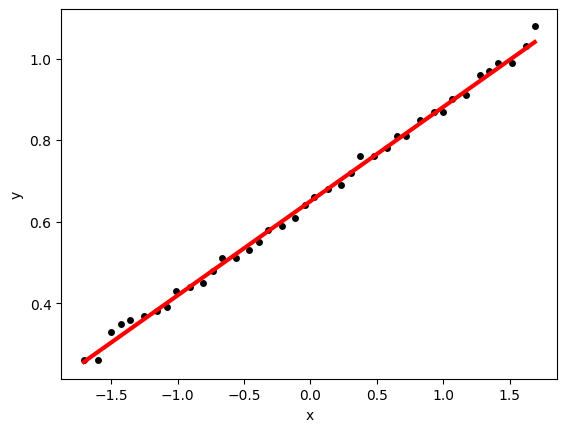

In [ ]:
# plot data with linear fit
s = np.linspace(np.min(x),np.max(x))
# choose the best model
# and obtain the corresponding weight
ind = np.argmin(cost_history)
w = weight_history[ind]

t = w[0] + w[1]*s

figure = plt.figure()
plt.plot(s,t,linewidth = 3,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##**Breast cancer dataset**

Here we will compare a run of gradient descent on standard and normalized data using a real 𝑁=8 input breast cancer dataset.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

First we load in the data and convert the data below.

Note this file has missing values, as suggested by the result from running the following command.

In [ ]:
!grep "?" *.txt

1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4
606140,1,1,1,1,2,?,2,1,1,2
61634,5,4,3,1,2,?,2,3,1,2
704168,4,6,5,6,7,?,4,9,1,2
733639,3,1,1,1,2,?,3,1,1,2
1238464,1,1,1,1,1,?,2,1,1,2
1057067,1,1,1,1,1,?,1,1,1,2


In [ ]:
# load in original dataset
import pandas as pd
data = pd.read_csv(datapath + 'breast_cancer_original.txt',header = None)

# drop user id column
data.drop(0, axis=1, inplace=True)

# replace '?' missing entries with np.nan values
data.replace('?', np.nan,inplace = True)

# replace arbitrary label values with pm 1
data[10].replace([2,4],[-1,1],inplace = True)

# convert all entries to floats
data = data.astype(float)

# convert dataframe to numpy array
data = data.values

# cut into input/output pairs
x = data[:,:-1].T
y = data[:,-1:].T

In [ ]:
# return normalization functions based on input x
normalizer,inverse_normalizer = standard_normalizer(x)

In [ ]:
# an implementation of the softmax cost
# implement the following function
def softmax(w):
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

In [ ]:
### cost functions ###
# implment the following function to count misclassifications
def counting_cost(w,x,y):
 y_pred = np.sign(model(x,w)) # predicted labels
 num_misclassifications = np.sum(y_pred != y) # number of misclassifications
 return num_misclassifications/float(np.size(y)) # misclassification rate


In [ ]:
np.random.seed(5819)
# load in an optimizer
g = softmax; w = 0.1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w, 'none')
count_history_1 = [counting_cost(v, x, y) for v in weight_history_1]

In [ ]:
# create normalizer
normalizer,inverse_normalizer = standard_normalizer(x)

# normalize input
x = normalizer(x)

np.random.seed(5819)
# load in an optimizer
g = softmax; w = 0.1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
#g = softmax; alpha_choice = 10**(0);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w, 'none')
count_history_2 = [counting_cost(v, x, y) for v in weight_history_2]

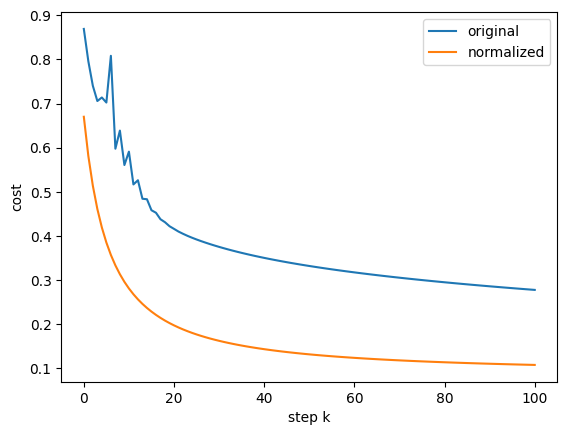

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(cost_history_1));
plt.plot(np.array(cost_history_2));
plt.xlabel("step k");
plt.ylabel("cost");
plt.legend(["original", "normalized"])
plt.show()

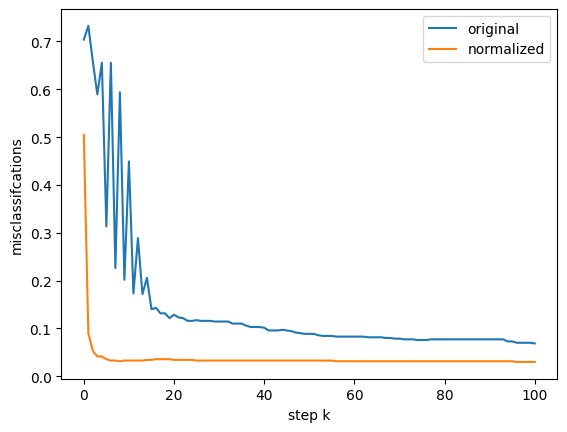

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(count_history_1))
plt.plot(np.array(count_history_2))
plt.xlabel("step k")
plt.ylabel("misclassifcations")
plt.legend(["original", "normalized"])
plt.show()

##**PCA sphering on MNIST**

Below is a Python implementation of PCA-sphereing. The input to the function PCA_sphereing is a data matrix x, and it returns two functions normalizer - that one can use to perform sperehing on any input (both training and future test points) - and inverse_normalizer that can be used to reverse the operation.
Notice that the only difference between how the method is detailed above and the actual implementation is in implementing step 3 we divide off the square root of the eigenvalues of the regularized covariance matrix. This is done for computational efficiency's sake since the  𝑛𝑡ℎ  eigenvalue  𝑑𝑛  actually equals the variance of the PCA-transformed data i.e.,  𝑑𝑛=𝜎2𝑛 , so dividing off its square root is equal to dividing off by the standard deviation.

In [ ]:
# compute eigendecomposition of data covariance matrix for PCA transformation
def PCA(x,**kwargs):
    # regularization parameter for numerical stability
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']

    # create the correlation matrix
    P = float(x.shape[1])
    Cov = 1/P*np.dot(x,x.T) + lam*np.eye(x.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    d,V = np.linalg.eigh(Cov)
    return d,V

# PCA-sphereing - use PCA to normalize input features
def PCA_sphereing(x,**kwargs):
    # Step 1: mean-center the data
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_centered = x - x_means

    # Step 2: compute pca transform on mean-centered data
    d,V = PCA(x_centered,**kwargs)

    # Step 3: divide off standard deviation of each (transformed) input,
    # which are equal to the returned eigenvalues in 'd'.
    stds = (d[:,np.newaxis])**(0.5)
    normalizer = lambda data: np.dot(V.T,data - x_means)/stds

    # create inverse normalizer
    inverse_normalizer = lambda data: np.dot(V,data*stds) + x_means

    # return normalizer
    return normalizer,inverse_normalizer

In [ ]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset from scikit-learn
mnist = fetch_openml('mnist_784', version=1)

# Extract the image data and labels
X, y = np.array(mnist['data']), np.array(mnist['target'])

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# normalize the pixel values
X = X.astype('float32') / 255.0
# Convert the labels to integers
y = y.astype('int32')

In [ ]:
# Randomly shuffle the image data and labels together
np.random.seed(5819)
permutation = np.random.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

In [ ]:
x_train = X[:50000]
y_train = y[:50000]
x_train = x_train.T
y_train = y_train.T
y_train = y_train[np.newaxis, :]

In [ ]:
# compute C linear combinations of input point, one per classifier
# implement the following function
def model(x,w):
  a = w[0] + np.dot(x.T,w[1:])
  return a.T

In [ ]:
# multiclass softmaax regularized by the summed length of all normal vectors
lam = 10**(-5)  # regularization paramter
def multiclass_softmax(w):
    # pre-compute predictions on all points
    all_evals = model(x,w)

    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0))

    # compute cost in compact form
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)

    cost /= float(np.size(y))

    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2

    # return average
    return cost

In [ ]:
# write code to obtain the misclassification history in a list
def misclass_history(weight_history):
  misc_history = []
  for w in weight_history:
    y_hat = np.argmax(model(x,w), axis = 0)
    mis = np.sum(y_hat != y)
    misc_history.append(mis)
  return misc_history

In [ ]:
# implement the following function that makes prediction based on
# data x, weights w and linear model model
# note this is used for multi-class classification
def prediction(x, w, model):
  y_pred = np.argmax(model(x,w), axis=0)
  return y_pred

In [ ]:
x = x_train
y = y_train
x.shape, y.shape

((784, 50000), (1, 50000))

In [ ]:
np.random.seed(5819)
N = x.shape[0]
C = len(np.unique(y))
# run gradient descent to minimize cost

g = multiclass_softmax; w = 0.1*np.random.randn(N+1,C); max_its = 100; alpha_choice = 1.0;
weight_history1,cost_history1 = gradient_descent(g,alpha_choice,max_its,w, version='full')
misc_history1 = misclass_history(weight_history1)
y_pred1 = prediction(x,weight_history1[-1], model)
print("Classfication accuracy on training data: ", 1- np.sum(y_pred1 != y)/y.shape[1])

Classfication accuracy on training data:  0.85048


In [ ]:
x = x_train
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)
np.random.seed(5819)
N = x.shape[0]
C = len(np.unique(y))
# run gradient descent to minimize cost

g = multiclass_softmax; w = 0.1*np.random.randn(N+1,C); max_its = 100; alpha_choice = 1.0;
weight_history2,cost_history2 = gradient_descent(g,alpha_choice,max_its,w, version='full')
misc_history2 = misclass_history(weight_history2)
y_pred2 = prediction(x,weight_history2[-1], model)
print("Classfication accuracy on training data: ", 1- np.sum(y_pred2 != y)/y.shape[1])

Classfication accuracy on training data:  0.89672


In [ ]:
# PCA_sherering
x = x_train
normalizer,inverse_normalizer = PCA_sphereing(x)
x = normalizer(x)

In [ ]:
np.random.seed(5819)
N = x.shape[0]
C = len(np.unique(y))
# run gradient descent to minimize cost

g = multiclass_softmax; w = 0.1*np.random.randn(N+1,C); max_its = 100; alpha_choice = 1.0;
weight_history3,cost_history3 = gradient_descent(g,alpha_choice,max_its,w, version='full')
misc_history3 = misclass_history(weight_history3)
y_pred3 = prediction(x,weight_history3[-1], model)
print("Classfication accuracy on training data: ", 1- np.sum(y_pred3 != y)/y.shape[1])

Classfication accuracy on training data:  0.9393


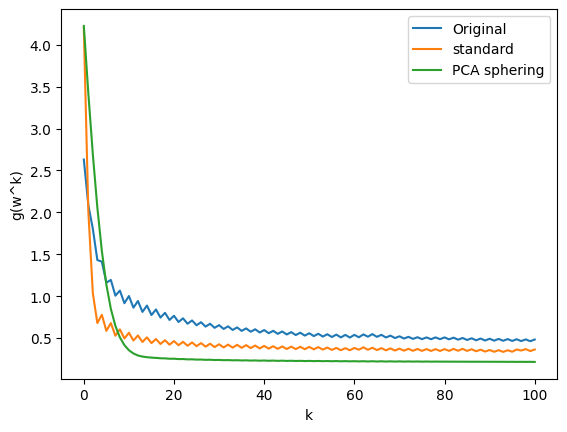

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cost_history1);
plt.plot(cost_history2);
plt.plot(cost_history3);
plt.xlabel("k");
plt.ylabel("g(w^k)");
plt.legend(["Original", "standard", "PCA sphering"]);
plt.show()

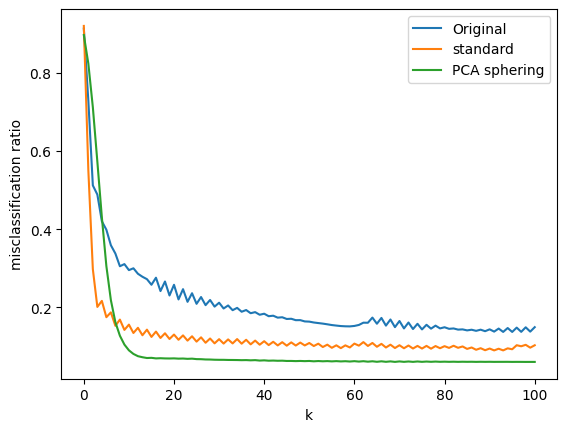

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(misc_history1)/y.shape[1]);
plt.plot(np.array(misc_history2)/y.shape[1]);
plt.plot(np.array(misc_history3)/y.shape[1]);
plt.xlabel("k");
plt.ylabel("misclassification ratio");
plt.legend(["Original", "standard", "PCA sphering"]);
plt.show()